In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

c:\Users\Guest 1\Desktop\ttl-agentic-ai\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv("forecasting_ready_1.csv")
df["Date"] = pd.to_datetime(df["Date"])

# Pick one SKU
sku = df["SKU_ID"].unique()[0]

sku_df = df[df["SKU_ID"] == sku][["Date", "Units_Sold"]]

sku_df = sku_df.rename(columns={
    "Date": "ds",
    "Units_Sold": "y"
})

sku_df = sku_df.sort_values("ds")

In [3]:
split_days = 30

train = sku_df[:-split_days]
test = sku_df[-split_days:]

print("Train size:", len(train))
print("Test size:", len(test))

Train size: 335
Test size: 30


In [9]:
model = Prophet(
    daily_seasonality=True,
    yearly_seasonality=False
)

model.fit(train)

20:03:19 - cmdstanpy - INFO - Chain [1] start processing
20:03:19 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
future = model.make_future_dataframe(periods=split_days)
forecast = model.predict(future)

In [11]:
predicted = forecast.tail(split_days)["yhat"].values
actual = test["y"].values

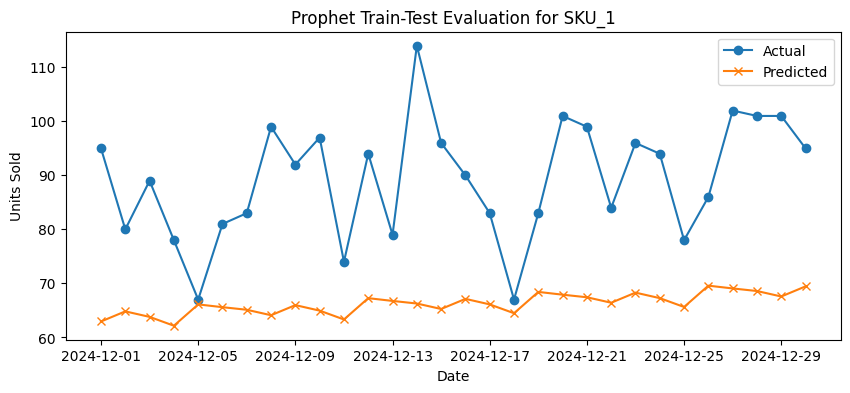

In [12]:
plt.figure(figsize=(10,4))
plt.plot(test["ds"], actual, label="Actual", marker="o")
plt.plot(test["ds"], predicted, label="Predicted", marker="x")
plt.legend()
plt.title(f"Prophet Train-Test Evaluation for {sku}")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.show()


In [13]:
mae = abs(actual - predicted).mean()
rmse = ((actual - predicted) ** 2).mean() ** 0.5

print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")

MAE  : 23.01
RMSE : 25.21
